In [1]:
from sklearn.datasets import load_breast_cancer

from sklearn.feature_selection import SelectFromModel, SelectPercentile

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import matplotlib

import numpy as np

In [25]:
import pandas as pd

In [2]:
matplotlib.rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
### datasets

cancer = load_breast_cancer()

In [4]:
### noise

rnd = np.random.RandomState(seed=0)

noise = rnd.normal(size=(cancer.data.shape[0], 70))

In [5]:
### np.hstack

cancer_data_noise = np.hstack([cancer.data, noise])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(cancer_data_noise, cancer.target,random_state=0, test_size=0.3)


In [11]:
randforest = RandomForestClassifier(n_estimators=100, random_state=0)

select_model = SelectFromModel(randforest, threshold='median').fit(x_train, y_train)



select_uni = SelectPercentile(percentile=50).fit(x_train, y_train)

In [20]:
sel=SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))

In [22]:
sel.fit(x_train,np.ravel(y_train))

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [23]:
sel.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True])

In [26]:
X_train=pd.DataFrame(x_train)

In [30]:
selected_feat = X_train.columns[(sel.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(sel.estimator_.coef_ == 0)))

total features: 100
selected features: 49
features with coefficients shrank to zero: 51


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


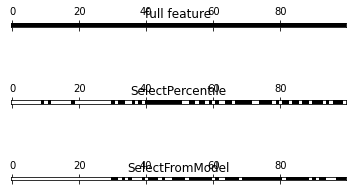

In [12]:
### visualization

models = [select_uni, select_model]

_, axes = plt.subplots(3, 1)



ones = np.ones(x_train.shape[1], dtype=np.bool)

axes[0].matshow(ones.reshape(1, -1), cmap='gray')

axes[0].set_yticks([])

axes[0].set_title('full feature')



for model, ax in zip(models, [axes[1], axes[2]]):

    x_train_model = model.transform(x_train)

    x_test_model = model.transform(x_test)



    idx = model.get_support()

    ax.matshow(idx.reshape(1, -1), cmap='gray')

    ax.set_yticks([])

    ax.set_title('{}'.format(model.__class__.__name__))

plt.show()

In [13]:
### 일반화

logreg = LogisticRegression().fit(x_train, y_train)

score = logreg.score(x_test, y_test)

print('total 특성의 정확도: {:.3f}'.format(score))

models = [select_uni, select_model]

names = ['univariate', 'model_based']

for model, name in zip(models, names):

    x_train_model = model.transform(x_train)

    x_test_model = model.transform(x_test)

    logreg = LogisticRegression().fit(x_train_model, y_train)

    score = logreg.score(x_test_model, y_test)

    print('{}의 정확도: {:.3f}'.format(name, score))

total 특성의 정확도: 0.924
univariate의 정확도: 0.942
model_based의 정확도: 0.930


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_